<a href="https://colab.research.google.com/github/GustaFTW/TensorFlow-ZTM/blob/main/section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem, but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter...predicting a number

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.9.2


## Creating data to view and fit

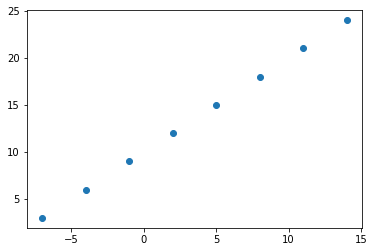

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1., 2., 5., 8., 11., 14.])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12., 15., 18., 21., 24.])

# Visualize it
plt.scatter(X, y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

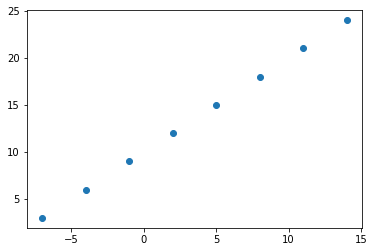

In [ ]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in others words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & y (features and labels).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer =tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=10)  

Epoch 1/10
1/1 [==============================] - 1s 631ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/10
1/1 [==============================] - 0s 11ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/10
1/1 [==============================] - 0s 23ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/10
1/1 [==============================] - 0s 12ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/10
1/1 [==============================] - 0s 13ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/10
1/1 [==============================] - 0s 15ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/10
1/1 [==============================] - 0s 11ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/10
1/1 [==============================] - 0s 15ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/10
1/1 [==============================] - 0s 10ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/10
1/1 [==============================] - 0s 12ms/step - loss: 10.3123 - mae: 10.3123


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.])
y_pred

1/1 [==============================] - 0s 119ms/step


array([[15.741023]], dtype=float32)

In [ ]:
y_pred + 11

array([[26.741024]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the models more examples to learn from)


In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)  

Epoch 1/100
1/1 [==============================] - 0s 325ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] -

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's see if our model's prediction has improved...
model.predict([17.])

1/1 [==============================] - 0s 225ms/step


array([[29.739855]], dtype=float32)

In [ ]:
# Rebuild our model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10)
])

# Recompile our model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# Refit our model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 622ms/step - loss: 14.2008 - mae: 14.2008
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 13.8439 - mae: 13.8439
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 13.5592 - mae: 13.5592
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 13.3192 - mae: 13.3192
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 13.0991 - mae: 13.0991
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 12.8901 - mae: 12.8901
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 12.6860 - mae: 12.6860
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 12.4801 - mae: 12.4801
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 12.2658 - mae: 12.2658
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 12.0366 - mae: 12.0366
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - los

In [ ]:
model.predict([23.])

1/1 [==============================] - 0s 75ms/step


array([[33.125557, 32.694893, 32.587185, 32.579975, 33.10867 , 33.40242 ,
        33.0739  , 32.818253, 32.072685, 32.86491 ]], dtype=float32)

In [ ]:
# Let's see if we can make another to improve our model

# 1. Creathe the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 391ms/step - loss: 13.3252 - mae: 13.3252
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 12.6189 - mae: 12.6189
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 11.9164 - mae: 11.9164
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 11.2153 - mae: 11.2153
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5129 - mae: 10.5129
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 9.8064 - mae: 9.8064
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 9.0930 - mae: 9.0930
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 8.3699 - mae: 8.3699
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 7.6340 - mae: 7.6340
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 6.8821 - mae: 6.8821
Epoch 11/100
1/1 [==============================] - 0s 9ms/step -

In [ ]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's try to make a prediction
model.predict([17.])

1/1 [==============================] - 0s 164ms/step


array([[27.324871]], dtype=float32)

## Evaluating a model 

In practice, a typical workflow you'll go through when building a neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?


In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

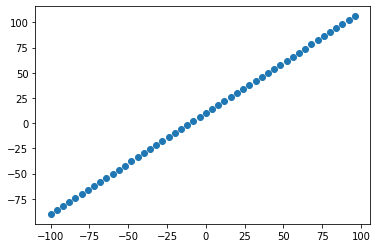

In [ ]:
# Visualize the data
plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.


In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data) 
y_train = X[:40]
X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = X[40:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets...let's visualize it again!

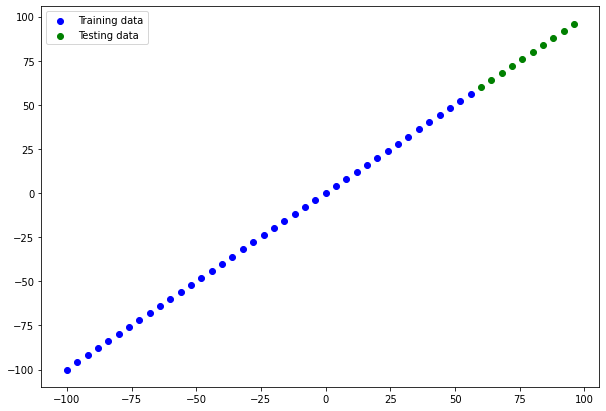

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")

# Show a legend
plt.legend();

In [ ]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 92.9015 - mae: 92.9015
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 56.9175 - mae: 56.9175
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 18.7966 - mae: 18.7966
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 12.2808 - mae: 12.2808
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 12.9206 - mae: 12.9206
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 10.6721 - mae: 10.6721
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 7.6169 - mae: 7.6169
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 6.7232 - mae: 6.7232
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 12.2149 - mae: 12.2149
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 15.1882 - mae: 15.1882
Epoch 11/100
2/2 [==============================] - 0s 5ms/step

### Visualizing the model

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learned patterns or parameters from other models during **transfer learning**).

In [ ]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=1000, verbose=0)

In [ ]:
# Get a summary of our model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


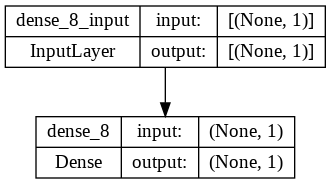

In [ ]:
from tensorflow.keras.utils import plot_model as pltmdl
pltmdl(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model predictions).

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 95ms/step


array([[60.06665 ],
       [64.07094 ],
       [68.07523 ],
       [72.07952 ],
       [76.08382 ],
       [80.08811 ],
       [84.0924  ],
       [88.096695],
       [92.10099 ],
       [96.10528 ]], dtype=float32)

In [ ]:
model.predict([0])

1/1 [==============================] - 0s 106ms/step


array([[0.00225378]], dtype=float32)

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")

  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")

  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")

  # Show the legend
  plt.legend();

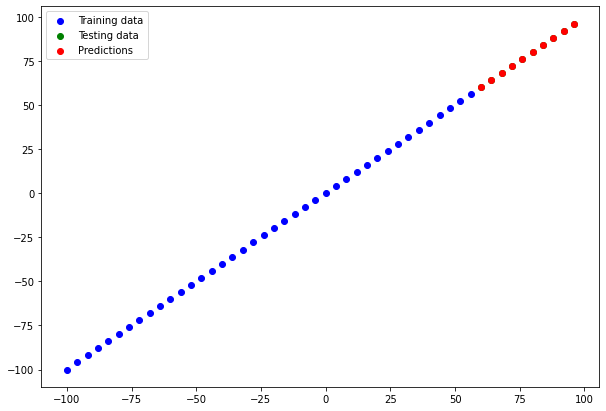

In [ ]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Sincec we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average error"

In [ ]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 263ms/step - loss: 0.0860 - mae: 0.0860


[0.08596344292163849, 0.08596344292163849]

In [ ]:
tf.constant(y_pred)
tf.squeeze(y_pred)
y_pred

array([[60.06665 ],
       [64.07094 ],
       [68.07523 ],
       [72.07952 ],
       [76.08382 ],
       [80.08811 ],
       [84.0924  ],
       [88.096695],
       [92.10099 ],
       [96.10528 ]], dtype=float32)

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.08596344>

In [ ]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true = y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.007541719>

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model
```
Build a model -> fit it -> evaluate it -> tweak it -> fit it ->...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs
4. `model_4` - 4 layers, trained for 500 epochs
5. `model_5` - 2 layers, trained for 500 epochs at a learning_rate of 0.01

**Build ``model_1``**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 15ms/step - loss: 15.3155 - mae: 15.3155
Epoch 2/100
2/2 [==============================] - 0s 17ms/step - loss: 12.7969 - mae: 12.7969
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 14.6829 - mae: 14.6829
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 14.4182 - mae: 14.4182
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 15.2908 - mae: 15.2908
Epoch 6/100
2/2 [==============================] - 0s 17ms/step - loss: 13.1122 - mae: 13.1122
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 9.8898 - mae: 9.8898
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 8.2459 - mae: 8.2459
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 14.4503 - mae: 14.4503
Epoch 10/100
2/2 [==============================] - 0s 14ms/step - loss: 17.1168 - mae: 17.1168
Epoch 11/100
2/2 [==============================] - 0s 10ms

1/1 [==============================] - 0s 141ms/step


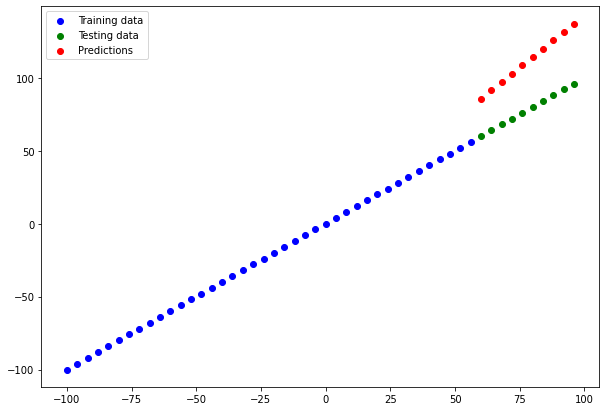

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=33.441204>,
 <tf.Tensor: shape=(), dtype=float32, numpy=33.441204>)

**Build ``model_2``**
 * 2 dense layers, trained for 100 epochs

In [ ]:
tf.random.set_seed(42)

# 1. Create model 2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(2),
    tf.keras.layers.Dense(1)
])

# 2. Compile our model 2
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit our model 2
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 7ms/step - loss: 29.8909 - mae: 29.8909
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 7.1468 - mae: 7.1468
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 13.0898 - mae: 13.0898
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 17.1342 - mae: 17.1342
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 25.9949 - mae: 25.9949
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 15.0455 - mae: 15.0455
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 13.9189 - mae: 13.9189
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 14.4987 - mae: 14.4987
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 35.1853 - mae: 35.1853
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 15.0550 - mae: 15.0550
Epoch 11/100
2/2 [==============================] - 0s 7ms/s

1/1 [==============================] - 0s 133ms/step


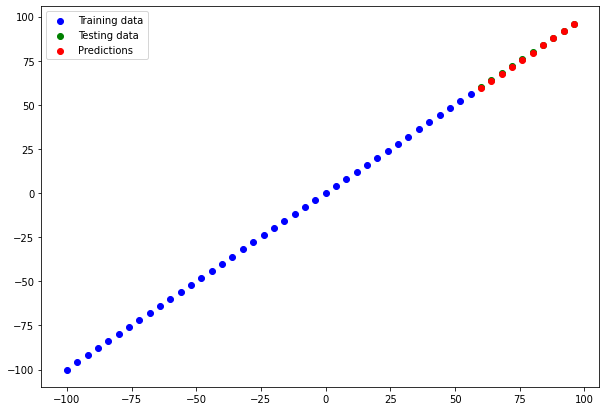

In [ ]:
# Make and plot predictions for model 2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model 2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=33.441204>,
 <tf.Tensor: shape=(), dtype=float32, numpy=33.441204>)

**Build ``model_3``**
  * 2 layers, trained for 500 epochs

In [ ]:
tf.random.set_seed(42)

# 1. Create the model 3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 3
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model 3
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)


Epoch 1/500
2/2 [==============================] - 0s 5ms/step - loss: 23.5832 - mae: 23.5832
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 20.7378 - mae: 20.7378
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 25.9282 - mae: 25.9282
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 38.8820 - mae: 38.8820
Epoch 5/500
2/2 [==============================] - 0s 11ms/step - loss: 17.6457 - mae: 17.6457
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 12.5874 - mae: 12.5874
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 14.0305 - mae: 14.0305
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 14.5762 - mae: 14.5762
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 35.2776 - mae: 35.2776
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 14.9355 - mae: 14.9355
Epoch 11/500
2/2 [==============================] - 0s 4ms

1/1 [==============================] - 0s 158ms/step


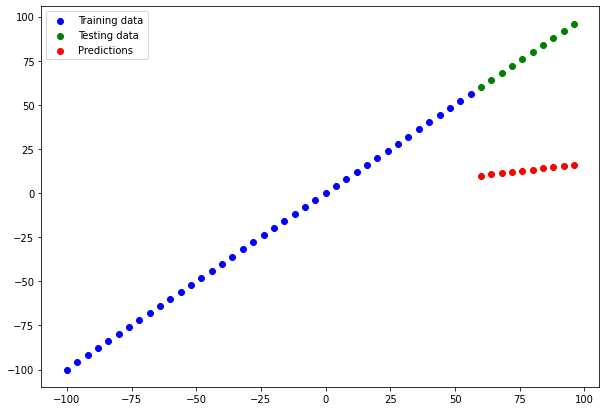

In [ ]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Check our model evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3


(<tf.Tensor: shape=(), dtype=float32, numpy=65.04007>,
 <tf.Tensor: shape=(), dtype=float32, numpy=65.04007>)

**Build ```model 4```**
  * 4 layers, trained for 500 epochs

In [ ]:
tf.random.set_seed(42)

# Create our model 4
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile our model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit our model
model_4.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 9ms/step - loss: 47.5389 - mae: 47.5389
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 103.9558 - mae: 103.9558
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 26.2687 - mae: 26.2687
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 41.1358 - mae: 41.1358
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 31.0213 - mae: 31.0213
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 49.8937 - mae: 49.8937
Epoch 7/500
2/2 [==============================] - 0s 11ms/step - loss: 38.9088 - mae: 38.9088
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 26.5741 - mae: 26.5741
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 38.9995 - mae: 38.9995
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 23.6767 - mae: 23.6767
Epoch 11/500
2/2 [==============================] - 0s 7

1/1 [==============================] - 0s 95ms/step


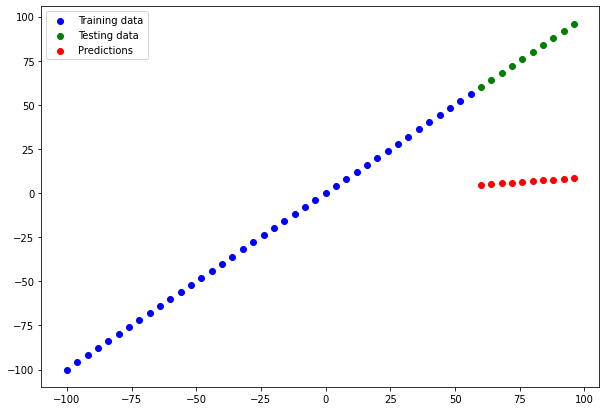

In [ ]:
# Make and plot predictions
y_preds_4 = model_4.predict(X_test)
plot_predictions(predictions=tf.reshape(y_preds_4, [10]))

In [ ]:
# Check our model evaluation metrics
mae_4 = mae(y_test, y_preds_4)
mse_4 = mse(y_test, y_preds_4)
mae_4, mse_4

(<tf.Tensor: shape=(), dtype=float32, numpy=71.46972>,
 <tf.Tensor: shape=(), dtype=float32, numpy=71.46972>)

**Build ``Model 5``**
  * 2 layers, trained for 500 epochs at a learning_rate of 0.01

In [ ]:
tf.random.set_seed(42)

# Build our model 5
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1)
])

# Compile our model 5
model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])

# Fit our model 5
model_5.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 7ms/step - loss: 17.1839 - mae: 17.1839
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 8.3090 - mae: 8.3090
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 1.1364 - mae: 1.1364
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 7.0406 - mae: 7.0406
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 7.7865 - mae: 7.7865
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 5.5075 - mae: 5.5075
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 1.6464 - mae: 1.6464
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 2.2664 - mae: 2.2664
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 2.7286 - mae: 2.7286
Epoch 10/500
2/2 [==============================] - 0s 10ms/step - loss: 1.1695 - mae: 1.1695
Epoch 11/500
2/2 [==============================] - 0s 5ms/step - loss: 1.51

1/1 [==============================] - 0s 68ms/step


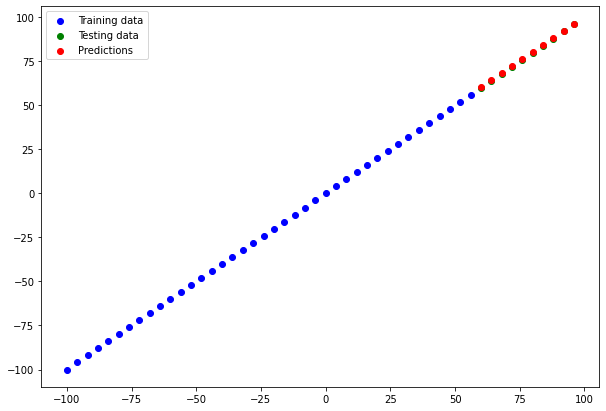

In [ ]:
# Make and plot predictions
y_preds_5 = model_5.predict(X_test)
plot_predictions(predictions=y_preds_5)

In [ ]:
# Check the evaluation metrics
mae_5 = mae(y_test, y_preds_5)
mse_5 = mse(y_test, y_preds_5)
mae_5, mse_5

(<tf.Tensor: shape=(), dtype=float32, numpy=0.3995964>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.3995964>)

You want to start with small experiments (small models) and make sure they work and then improve them

## Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()],
                 ["model_4", mae_4.numpy(), mse_4.numpy()],
                 ["model_5", mae_5.numpy(), mse_5.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results


,model,mae,mse
0,model_1,33.441204,33.441204
1,model_2,0.397734,0.397734
2,model_3,65.040070,65.040070
3,model_4,71.469719,71.469719
4,model_5,0.399596,0.399596


Looks like ``model_2`` perfomed the best...

In [ ]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 2)                 4         
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_5.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 20)                40        
                                                                 
 dense_19 (Dense)            (None, 1)                 21        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto: "experiment, experiment, experiment"

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!
**Resource:** As you build more models, you'll want to look into using:
* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).

 ## Saving our models

 Saving our models allows us to use them ouside of Google Colab (or wherever they were trained) such as a web application or a mobile app

 There are two main formats we can save our model's too:
 1. The SavedModel format
 2. The HDF5 format

In [ ]:
# Save model using the SavedModel format
model_5.save("best_model_SavedModel_format")

In [ ]:
# Save model using the HDF5 format
model_5.save("best_model_SavedModel_format.h5")

### Loading in a saved model

In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 20)                40        
                                                                 
 dense_19 (Dense)            (None, 1)                 21        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_5 predictions with SavedModel format model predictions
model_5_preds = model_5.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_5_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 84ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_SavedModel_format.h5") 
loaded_h5_model.summary() == model_5.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 20)                40        
                                                                 
 dense_19 (Dense)            (None, 1)                 21        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 20)                40        
                                                                 
 dense_19 (Dense)            (None, 1)                 21        
                                                                 
Total params: 61
Trainable params:

True

In [ ]:
# Check to see if loaded .h5 predictions match model_5
model_5_preds = model_5.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_5_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 46ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

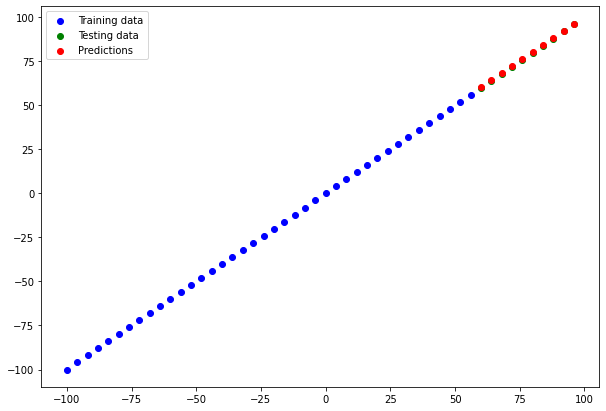

In [ ]:
plot_predictions(predictions = loaded_h5_model_preds)

### A larger example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]


In [ ]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# View Y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
# Build a neural network (sor of like model_5 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=300, verbose=0)

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3415.4319 - mae: 3415.4319


[3415.431884765625, 3415.431884765625]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well... let's try and improve it!

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Train for longer (200 epochs)
3. Change the learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile our model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4924.4956 - mae: 4924.4956


[4924.49560546875, 4924.49560546875]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7097.6890 - mae: 7097.6890


[7097.68896484375, 7097.68896484375]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, verbose=0, epochs=200)

In [ ]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3488.7854 - mae: 3488.7856


[3488.785400390625, 3488.78564453125]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7097.6890 - mae: 7097.6890


[7097.68896484375, 7097.68896484375]

In [ ]:
tf.random.set_seed(42)

# Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics=["mae"])

# Fit the model
insurance_model_4.fit(X_train, y_train, epochs= 200, verbose=0)

In [ ]:
# Evaluate our fourth model
insurance_model_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3186.3906 - mae: 3186.3906


[3186.390625, 3186.390625]

Text(0.5, 0, 'epochs')

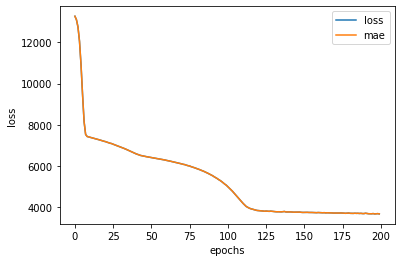

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**Question:** How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the EarlyStopping Callback, which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.  

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.
If you're not sure on which to use, you could try both and see which performs better.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0s and 1s
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes.

In [ ]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                               optimizer=tf.keras.optimizers.Adam(),
                               metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100, verbose=0)

In [ ]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

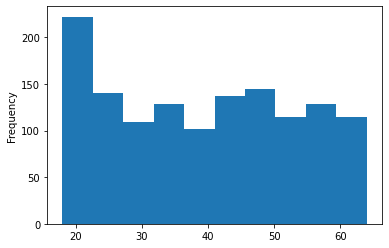

In [ ]:
X["age"].plot(kind="hist")

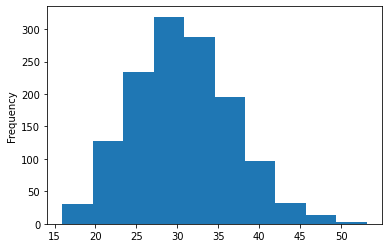

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

### Exercises and extra-curriculum

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

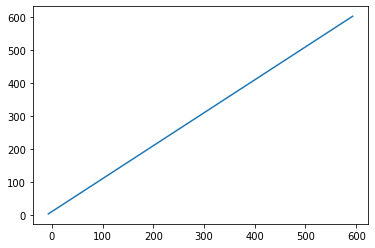

In [ ]:
# Creating the bigger dataset
X = [-7]
y = [3]
for i in range(200):
  X.append(X[i] + 3)  
for i in range(200):
  y.append(y[i] + 3)
plt.plot(X, y)

In [ ]:
# Diving our data into training and test sets
X_train = tf.constant(X[:160])
y_train = tf.constant(y[:160])
X_test = tf.constant(X[160:])
y_test = tf.constant(y[160:])

In [ ]:
# Building the model
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.losses.mae,
              optimizer=tf.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [ ]:
# Evaluating our model
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 5.7791 - mae: 4.5434


[5.77910852432251, 4.543420314788818]

In [ ]:
# Predicting with our model
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")

  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")

  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")

  # Show the legend
  plt.legend();

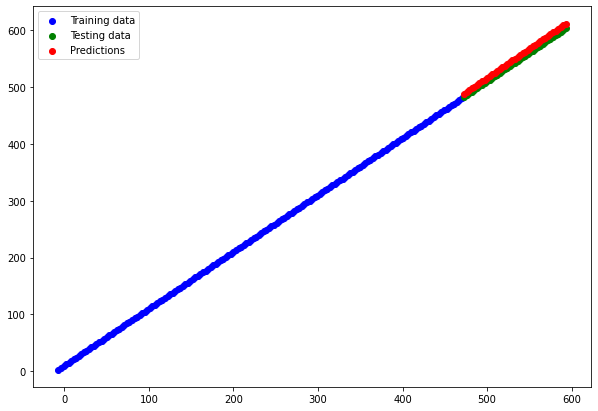

In [ ]:
plot_predictions()

In [ ]:
# Creating the insurance model
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Create X and y
X_insurance = insurance.drop("charges", axis=1)
y_insurance = insurance["charges"]
X_insurance.head() 

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [ ]:
y_insurance.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer( # method that receives both the 'portraits' of how u want to transform the columns and the columns to be transformed
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0s and 1s
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]) # hot encode the columns (handle_unknown parameter sets the mode how to handle when finding unknown data)
)

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_insurance, y_insurance, test_size=0.2, random_state=42)

# Fit the transformer to our training data
ct.fit(X_train)

# Transform our data and store it (there is no need to do that with y data because no transformer is needed there)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [ ]:
# Now that our data is pre processed, we'll create the model

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile our model
insurance_model.compile(loss=tf.losses.mae,
                        optimizer=tf.optimizers.Adam(learning_rate=0.01),
                        metrics=["mae"])

# 3. Fit our model
insurance_model.fit(X_train, y_train, epochs=300, verbose=0)

In [ ]:
# Evaluating our model 
insurance_model.evaluate(X_test, y_test)


9/9 [==============================] - 0s 2ms/step - loss: 3168.5474 - mae: 3168.5474


[3168.54736328125, 3168.54736328125]

In [ ]:
# Loading the boston dataset
train, test = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=42
)
X_train = train[0]
y_train = train[1]
X_test = test[0]
y_test = test[1]

In [ ]:
# 1. Creating a model
boston_model = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
boston_model.compile(loss=tf.losses.mae,
                     optimizer=tf.optimizers.Adam(learning_rate=0.01),
                     metrics=["mae"])

# 3. Fit the model
boston_model.fit(X_train, y_train, epochs=500, verbose=0)

In [ ]:
# Evaluate our model
boston_model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 3.4546 - mae: 3.4546


[3.4546029567718506, 3.4546029567718506]

In [ ]:
# Getting and modeling another dataset
car_price = pd.read_csv("/content/archive.zip", encoding="ISO-8859-1")
car_price = car_price.drop("customer e-mail", axis=1)
car_price = car_price.drop("country", axis=1)
car_price = car_price.drop("gender", axis=1)
car_price = car_price.drop("customer name", axis=1)

car_price

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...
495,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [ ]:
# Splitting the training and test sets
X_train = car_price.drop("car purchase amount", axis=1)[:400]
y_train = car_price["car purchase amount"][:400]

# Now for the test sets
X_test = car_price.drop("car purchase amount", axis=1)[400:]
y_test = car_price["car purchase amount"][400:]

,age,annual Salary,credit card debt,net worth
400,61.704299,66655.41420,8001.644302,805075.5197
401,48.593221,63718.88120,11863.064280,298920.0067
402,42.884536,60862.97749,8033.550461,344060.1754
403,36.245257,67508.12293,10188.686850,141587.6498
404,61.224725,61639.76386,17870.637650,684209.5510
...,...,...,...,...
495,41.462515,71942.40291,6995.902524,541670.1016
496,37.642000,56039.49793,12301.456790,360419.0988
497,53.943497,68888.77805,10611.606860,764531.3203
498,59.160509,49811.99062,14013.034510,337826.6382


In [ ]:
# Now for the model
tf.random.set_seed(42)
model_car = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_car.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                  metrics=["mae"])

model_car.fit(X_train, y_train, epochs=500, verbose=0)

In [ ]:
# Evaluate our model 
model_car.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 5491.3394 - mae: 5491.3394


[5491.33935546875, 5491.33935546875]